In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)


In [15]:
# Input data (4 samples, 2 features)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output (4 samples, 2 outputs)
R = np.array([
    [0, 0],
    [1, 0],
    [1, 0],
    [0, 1]
])


In [16]:
# Input → Hidden Layer 1
W1 = np.random.randn(2, 2)
b1 = np.zeros((1, 2))

# Hidden Layer 1 → Hidden Layer 2
W2 = np.random.randn(2, 2)
b2 = np.zeros((1, 2))

# Hidden Layer 2 → Output Layer
W3 = np.random.randn(2, 2)
b3 = np.zeros((1, 2))


In [17]:
# Hyperparameters
alpha = 0.1
epochs = 10000

# Activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [18]:
error_list = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)

    # Error calculation
    error = R - A3
    total_error = np.mean(np.square(error))
    error_list.append(total_error)

    # Backward pass
    dA3 = error * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dA3)
    db3 = np.sum(dA3, axis=0, keepdims=True)

    dA2 = np.dot(dA3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # Update weights and biases
    W3 += alpha * dW3
    b3 += alpha * db3
    W2 += alpha * dW2
    b2 += alpha * db2
    W1 += alpha * dW1
    b1 += alpha * db1

    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {total_error:.5f}")


Epoch 0, Error: 0.31835
Epoch 1000, Error: 0.21846
Epoch 2000, Error: 0.21244
Epoch 3000, Error: 0.18229
Epoch 4000, Error: 0.15636
Epoch 5000, Error: 0.13456
Epoch 6000, Error: 0.07536
Epoch 7000, Error: 0.01797
Epoch 8000, Error: 0.00746
Epoch 9000, Error: 0.00442


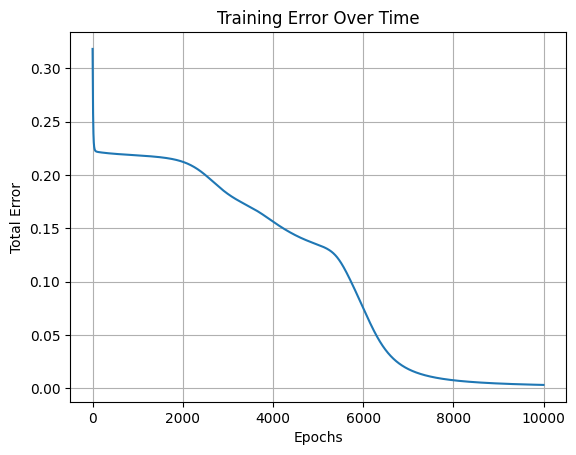

In [19]:
plt.plot(error_list)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Training Error Over Time")
plt.grid()
plt.show()


In [20]:
print("Final Output Predictions:")
print(np.round(A3, 3))


Final Output Predictions:
[[0.071 0.001]
 [0.93  0.032]
 [0.918 0.033]
 [0.068 0.963]]


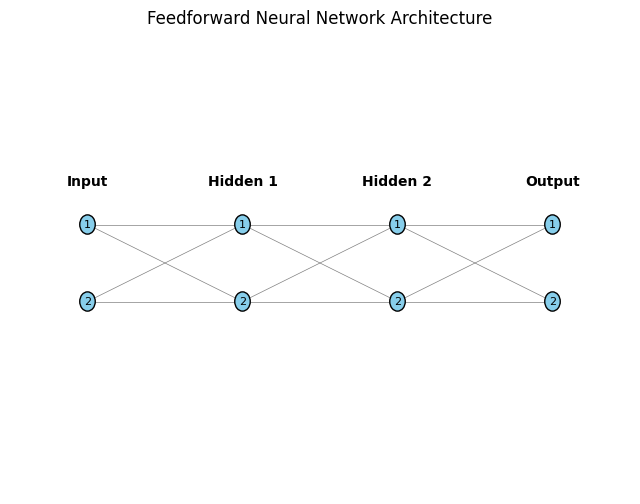

In [21]:
def plot_network():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')

    layer_sizes = [2, 2, 2, 2]
    layer_names = ["Input", "Hidden 1", "Hidden 2", "Output"]
    x_spacing = 1.0
    y_spacing = 0.4
    node_radius = 0.05

    for i, (size, name) in enumerate(zip(layer_sizes, layer_names)):
        x = i * x_spacing
        y_start = (size - 1) * y_spacing / 2
        for j in range(size):
            y = y_start - j * y_spacing
            circle = plt.Circle((x, y), node_radius, color='skyblue', ec='black', zorder=2)
            ax.add_patch(circle)
            ax.text(x, y, f'{j+1}', ha='center', va='center', fontsize=8)
        ax.text(x, y_start + 0.2, name, ha='center', fontsize=10, fontweight='bold')

    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            y1 = (layer_sizes[i] - 1) * y_spacing / 2 - j * y_spacing
            for k in range(layer_sizes[i + 1]):
                y2 = (layer_sizes[i + 1] - 1) * y_spacing / 2 - k * y_spacing
                ax.plot([i * x_spacing, (i + 1) * x_spacing], [y1, y2], 'gray', lw=0.5, zorder=1)

    plt.title("Feedforward Neural Network Architecture")
    plt.xlim(-0.5, len(layer_sizes) - 0.5)
    plt.ylim(-1.2, 1.2)
    plt.show()

plot_network()
